In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
os.getcwd()

'C:\\OtherProjects\\GPU_tests'

In [21]:
# Create stats dictionary

stats_path_gen = Path(os.getcwd()).rglob('stats.csv')
stats_dict = {}

for stats_path in stats_path_gen:
    stats_path_splitted = os.path.normpath(stats_path).split(os.sep)
    stats_dict[stats_path_splitted[-4] + "_" + stats_path_splitted[-2]] = pd.read_csv(stats_path)

In [23]:
list(stats_dict.keys())

['GAN_GPU_tests_Colab_CPU_20200318162139',
 'GAN_GPU_tests_Tesla_K80_20200317212704',
 'GAN_GPU_tests_Tesla_P100-PCIE-16GB_20200317175444',
 'GAN_GPU_tests_Tesla_P4_20200318074256',
 'GAN_GPU_tests_Tesla_T4_20200317185004',
 'GAN_GPU_tests_GeForce_GTX_1050_20200317190205',
 'GAN_GPU_tests_Local_CPU_20200318143257',
 'Resnet_GPU_tests_Tesla_K80_20200319103754',
 'Resnet_GPU_tests_Tesla_P100-PCIE-16GB_20200318213725',
 'Resnet_GPU_tests_Tesla_P4_20200319081842',
 'Resnet_GPU_tests_Tesla_T4_20200319093416',
 'Resnet_GPU_tests_GeForce_GTX_1050_20200318224127']

In [26]:
# Get GAN training times

gan_times = {
    'Epoch': list(stats_dict['GAN_GPU_tests_GeForce_GTX_1050_20200317190205']['Epoch']),
    'local_GTX_1050': list(stats_dict['GAN_GPU_tests_GeForce_GTX_1050_20200317190205']['Epoch_time']),
    'colab_P4': list(stats_dict['GAN_GPU_tests_Tesla_P4_20200318074256']['Epoch_time']),
    'colab_K80': list(stats_dict['GAN_GPU_tests_Tesla_K80_20200317212704']['Epoch_time']),
    'colab_T4': list(stats_dict['GAN_GPU_tests_Tesla_T4_20200317185004']['Epoch_time']),
    'colab_P100': list(stats_dict['GAN_GPU_tests_Tesla_P100-PCIE-16GB_20200317175444']['Epoch_time'])
}

In [29]:
# Get Resnet training times

resnet_times = {
    'Epoch': list(stats_dict['Resnet_GPU_tests_GeForce_GTX_1050_20200318224127']['Epoch']),
    'local_GTX_1050': list(stats_dict['Resnet_GPU_tests_GeForce_GTX_1050_20200318224127']['Epoch_time']),
    'colab_P4': list(stats_dict['Resnet_GPU_tests_Tesla_P4_20200319081842']['Epoch_time']),
    'colab_K80': list(stats_dict['Resnet_GPU_tests_Tesla_K80_20200319103754']['Epoch_time']),
    'colab_T4': list(stats_dict['Resnet_GPU_tests_Tesla_T4_20200319093416']['Epoch_time']),
    'colab_P100': list(stats_dict['Resnet_GPU_tests_Tesla_P100-PCIE-16GB_20200318213725']['Epoch_time'])
}

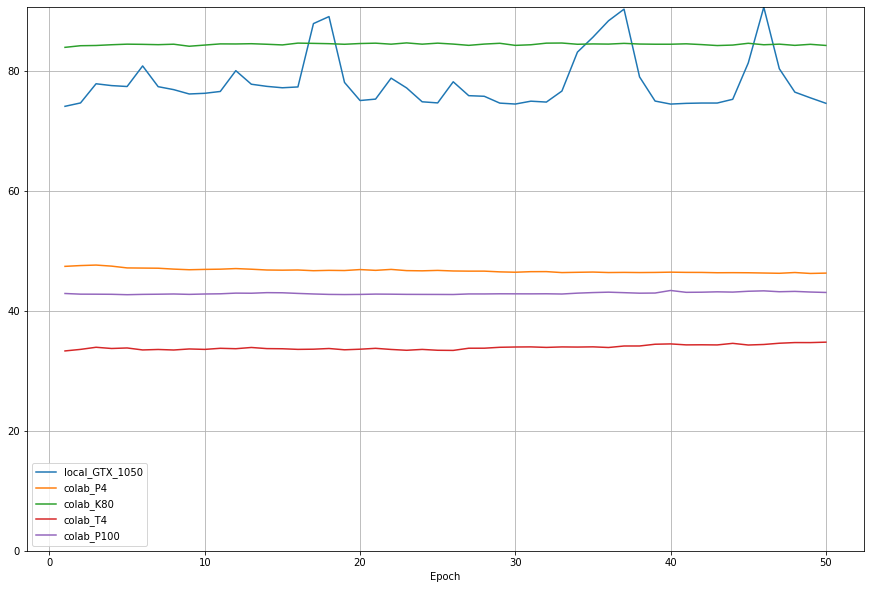

In [59]:
# GAN training times plot

df_gan_times = pd.DataFrame(gan_times)
df_gan_times.set_index('Epoch').plot(figsize=(15,10), grid=True, ylim=(0, df_gan_times.max().max()))

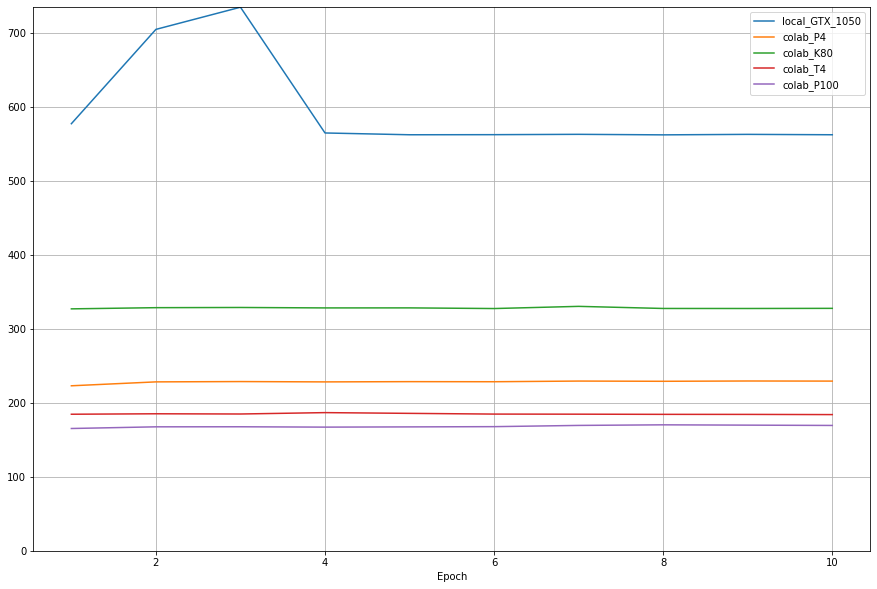

In [58]:
# Resnet training times plot

df_resnet_times = pd.DataFrame(resnet_times)
df_resnet_times.set_index('Epoch').plot(figsize=(15,10), grid=True, ylim=(0, df_resnet_times.max().max()))